In [ ]:
 from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 15s 4ms/step - loss: 0.6421 - accuracy: 0.8283 - val_loss: 0.2066 - val_accuracy: 0.9402
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1915 - accuracy: 0.9465 - val_loss: 0.1494 - val_accuracy: 0.9568
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9608 - val_loss: 0.1222 - val_accuracy: 0.9649
Epo

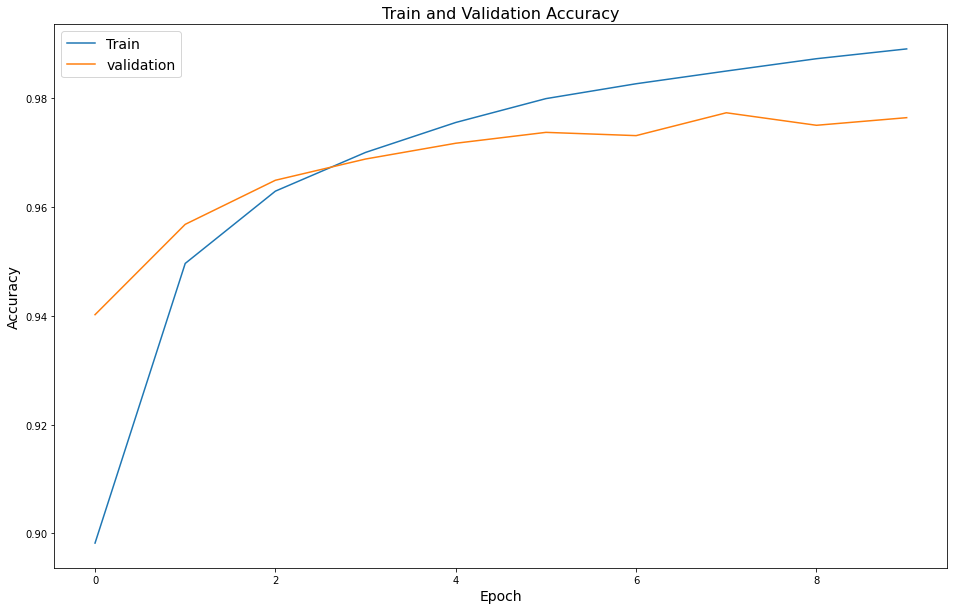

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


model = Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu'))

model.add(Dense(10, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

#If you want to draw the graph of model please write the following code,otherwise the above code is enough
plt.figure(1, figsize=(16, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and Validation Accuracy', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(['Train', 'validation'], fontsize = 14)
plt.show()
